# E-Commerce - Identify Consumer Profiles

In order to do analysis for supplies and demand, The e-commerce need to identify the Costumer Profiles. So the e-commerce can reach more target and increase the customer's satisfaction.

## Contents <a id = 'content'> </a>

*   [Introduction](#intro)
*   [Data Preparation](#prep)
*   [Data Analysis](#analysis)
  *   [Carry out exploratory data analysis](#explor)
  *   [Segment users based on their purchase history](#segment)
*   [Testing Hypothesis](#hypothesis)
*   [Summary](#summ)

## Introdruction <a id = 'intro'></a>

### 1.1 Goals



*   Revenue Trend
*   Average Revenue Trend Per User
*   Month to Month Average Revenue Trend
*   Identify Customer by Purchase History
*   Identify Customer Need



### 1.2 Stages

* Data preparation
  - Checking for data type,
  - Null data, &
  - Data exploration.
* Data Analytics
  - Revenue Trend,
  - Average Purchase Size,
  - Month to Month Trend,
  - Seasonal User Segment,
  - Long Term User Segment,
  - Short Term User Segment, &
  - Big Orders User.
* Hypothesis Test

## Data Preparation <a id = 'prep' ></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
data = pd.read_csv('/content/ecommerce_dataset_us.csv', sep = '\t')
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
6701,536975,22848,BREAD BIN DINER STYLE PINK,2,12/01/2018 14:04,16.95,14911.0
317880,564818,22763,KEY CABINET MA CAMPAGNE,2,08/28/2019 12:10,19.96,NaN
170766,551340,47559B,TEA TIME OVEN GLOVE,2,04/25/2019 17:23,2.46,NaN
101585,544928,22441,GROW YOUR OWN BASIL IN ENAMEL MUG,1,02/22/2019 18:07,4.13,NaN
262398,559914,84378,SET OF 3 HEART COOKIE CUTTERS,1,07/11/2019 15:13,3.29,NaN


Data containing information about :     

*	InvoiceNo
*	StockCode
*	Description
*	Quantity
*	InvoiceDate
*	UnitPrice
*	CustomerID



### Data Type

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


On this step, The data type get adjust to the correct type. The detail of the changes :    
*  `InvoiceDate` type from `object` to `datetime64[ns]`

### Null Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


In [ ]:
new_data = data[data['UnitPrice'] != 0]
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539394 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539394 non-null  object        
 1   StockCode    539394 non-null  object        
 2   Description  539394 non-null  object        
 3   Quantity     539394 non-null  int64         
 4   InvoiceDate  539394 non-null  datetime64[ns]
 5   UnitPrice    539394 non-null  float64       
 6   CustomerID   406789 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.9+ MB


In [ ]:
new_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0


In [ ]:
new_data[new_data['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0


Here's some finding on null data step :
* Row with `UnitPrice 0` get eliminate, &
* `UnitPrice below 0` mean its a refund.


### Data Exploration

In [ ]:
new_data['date'] = pd.to_datetime(new_data['InvoiceDate'])
new_data.head()

<ipython-input-12-e92917f3f215>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['date'] = pd.to_datetime(new_data['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00


In [ ]:
new_data['revenue'] = new_data['Quantity'] * new_data['UnitPrice']
new_data.head()

<ipython-input-13-225e873c9b94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['revenue'] = new_data['Quantity'] * new_data['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,date,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34


In [ ]:
new_data['month'] = new_data['InvoiceDate'].dt.month
new_data.head()

<ipython-input-14-a8da18546dc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['month'] = new_data['InvoiceDate'].dt.month


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,date,revenue,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29 08:26:00,15.30,11
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34,11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29 08:26:00,22.00,11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34,11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34,11


In [ ]:
new_data['month_year'] = pd.to_datetime(new_data['InvoiceDate'].dt.strftime('%Y-%m'))
new_data.head()

<ipython-input-15-1a3034f4bdb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['month_year'] = pd.to_datetime(new_data['InvoiceDate'].dt.strftime('%Y-%m'))


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,date,revenue,month,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29 08:26:00,15.30,11,2018-11-01
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34,11,2018-11-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29 08:26:00,22.00,11,2018-11-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34,11,2018-11-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34,11,2018-11-01


Here's some finding on exploration step :
* `date` containing the date of the `InvoiceDate`
* `month` containing the month of the `InvoiceDate`
* `revenue` containing the revenue from `Quantity * UnitPrice`

## Data Analysis <a id = 'analysis'></a>

### Carry out exploratory data analysis <a id = 'explor'></a>

#### Revenue Trend <a id = 'rev'></a>

In [ ]:
revenue = new_data.groupby(['month_year']).agg({
    'revenue' : 'sum'
}).reset_index()
revenue.head()

,month_year,revenue
0,2018-11-01,104842.84
1,2018-12-01,644114.18
2,2019-01-01,609481.93
3,2019-02-01,492349.14
4,2019-03-01,663890.70


In [ ]:
revenue = revenue.sort_values(by = 'month_year')
revenue

,month_year,revenue
0,2018-11-01,104842.840
1,2018-12-01,644114.180
2,2019-01-01,609481.930
3,2019-02-01,492349.140
4,2019-03-01,663890.700
5,2019-04-01,475780.001
6,2019-05-01,769062.060
7,2019-06-01,651601.730
8,2019-07-01,704438.401
9,2019-08-01,725412.070


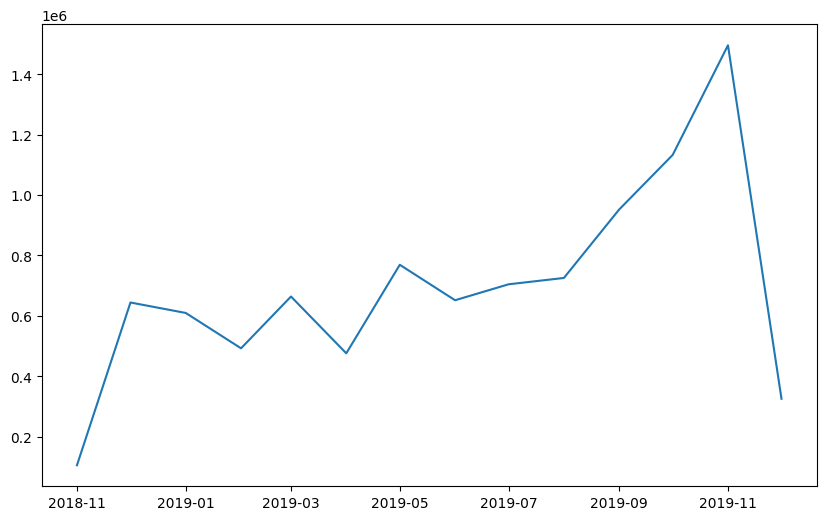

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(revenue['month_year'], revenue['revenue'])
plt.show()

In [ ]:
revenue.describe()

,month_year,revenue
count,14,1.400000e+01
mean,2019-05-17 03:25:42.857142784,6.962677e+05
min,2018-11-01 00:00:00,1.048428e+05
25%,2019-02-08 00:00:00,5.216323e+05
50%,2019-05-16 12:00:00,6.577462e+05
75%,2019-08-24 06:00:00,7.581496e+05
max,2019-12-01 00:00:00,1.496273e+06
std,NaN,3.389506e+05


The result of Revenue Trend :
- Lowest revenue on `2018-11` with `104842.84`
- And Highest revenue on `2019-11` with `1496272.65`

#### Average purchase size and its trends <a id = 'purchase_size'></a>

In [ ]:
size = new_data.groupby(['date', 'month_year', 'CustomerID', 'InvoiceNo']).agg({
    'revenue' : 'mean'
}).reset_index()
size.head()

,date,month_year,CustomerID,InvoiceNo,revenue
0,2018-11-29 08:26:00,2018-11-01,17850.0,536365,19.874286
1,2018-11-29 08:28:00,2018-11-01,17850.0,536366,11.100000
2,2018-11-29 08:34:00,2018-11-01,13047.0,536367,23.227500
3,2018-11-29 08:34:00,2018-11-01,13047.0,536368,17.512500
4,2018-11-29 08:35:00,2018-11-01,13047.0,536369,17.850000


In [ ]:
size_date = size.groupby('month_year').agg({
    'revenue' : 'mean'
})
size_date.sort_values(by = 'month_year').reset_index()

,month_year,revenue
0,2018-11-01,49.858239
1,2018-12-01,34.622817
2,2019-01-01,33.761402
3,2019-02-01,39.227658
4,2019-03-01,32.849544
5,2019-04-01,30.135289
6,2019-05-01,34.056470
7,2019-06-01,34.193679
8,2019-07-01,26.720623
9,2019-08-01,33.595408


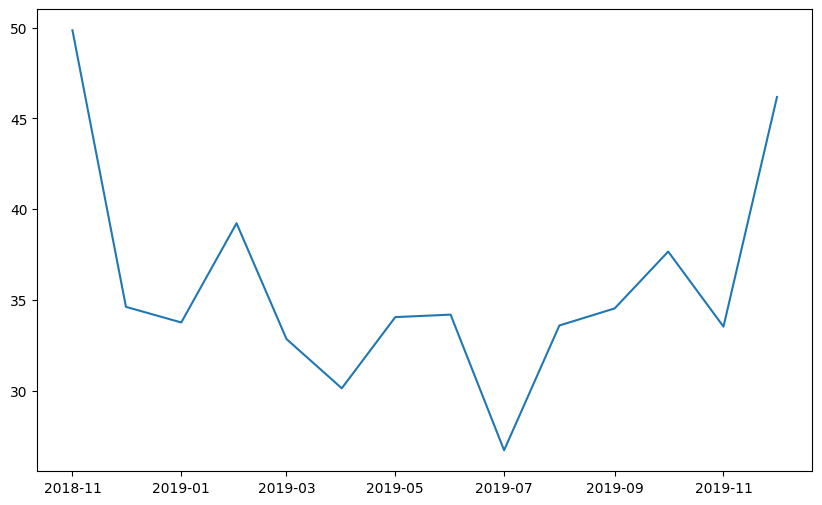

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(size_date)
plt.show()

In [ ]:
size_date.describe()

,revenue
count,14.000000
mean,35.781329
std,5.991348
min,26.720623
25%,33.548358
50%,34.125075
75%,36.905984
max,49.858239


The result of Average purchase size :     
- Average on `35.82`
- Lowest revenue on `26.72`
- Highest on `50.01`

#### Month-to-month trends in average revenue per user<a id = 'mtm'></a>

In [ ]:
mtm_data = new_data.groupby(['month_year', 'CustomerID']).agg({
    'revenue' : 'mean'
}).reset_index()
mtm_data.head()

,month_year,CustomerID,revenue
0,2018-11-01,12431.0,25.589286
1,2018-11-01,12433.0,26.289589
2,2018-11-01,12471.0,-17.000000
3,2018-11-01,12472.0,-8.735714
4,2018-11-01,12583.0,42.793000


In [ ]:
mtm = mtm_data.groupby('month_year').agg({
    'revenue' : 'mean'
})
mtm

,revenue
month_year,
2018-11-01,41.220360
2018-12-01,38.142346
2019-01-01,36.846355
2019-02-01,34.305851
2019-03-01,32.920862
2019-04-01,30.060717
2019-05-01,36.354917
2019-06-01,29.101410
2019-07-01,24.849919


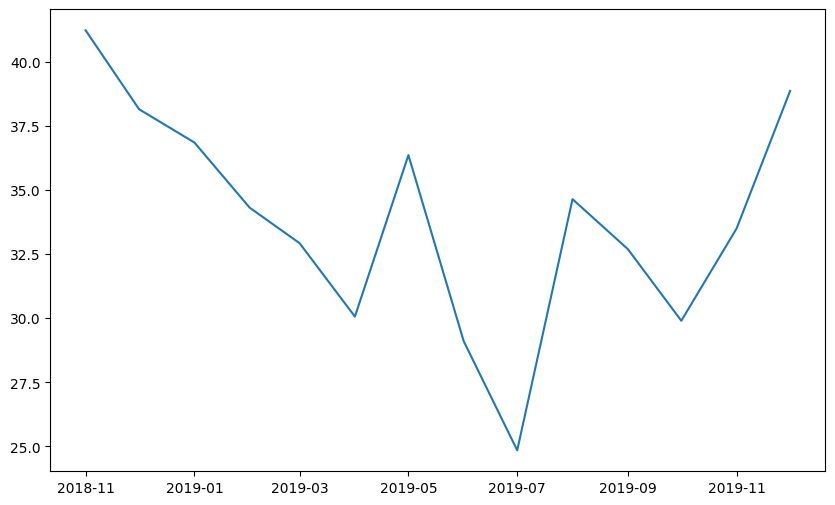

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(mtm)
plt.show()

In [ ]:
mtm.describe()

,revenue
count,14.000000
mean,33.813148
std,4.383021
min,24.849919
25%,30.718584
50%,33.900313
75%,36.723496
max,41.220360


Month to month revenue trend's result :
- The average number is on `33.81`
- The minimal is on `24.84`
- The maximal is on `41.22`

### Segment users based on their purchase history<a id = 'segment'></a>

#### Long Period

In [ ]:
summ_listing = new_data.groupby('CustomerID').agg({
    'InvoiceNo' : 'nunique',
    'InvoiceDate' : 'min',
    'date' : 'max'
}).reset_index()
summ_listing.head()

,CustomerID,InvoiceNo,InvoiceDate,date
0,12346.0,2,2019-01-16 10:01:00,2019-01-16 10:17:00
1,12347.0,7,2018-12-05 14:57:00,2019-12-05 15:52:00
2,12348.0,4,2018-12-14 19:09:00,2019-09-23 13:13:00
3,12349.0,1,2019-11-19 09:51:00,2019-11-19 09:51:00
4,12350.0,1,2019-01-31 16:01:00,2019-01-31 16:01:00


In [ ]:
summ_listing['CustomerID'].nunique()

4371

In [ ]:
repeater = summ_listing[summ_listing['InvoiceNo'] != 1]
repeater.head()

,CustomerID,InvoiceNo,InvoiceDate,date
0,12346.0,2,2019-01-16 10:01:00,2019-01-16 10:17:00
1,12347.0,7,2018-12-05 14:57:00,2019-12-05 15:52:00
2,12348.0,4,2018-12-14 19:09:00,2019-09-23 13:13:00
5,12352.0,11,2019-02-14 12:33:00,2019-11-01 14:37:00
9,12356.0,3,2019-01-16 09:50:00,2019-11-15 08:40:00


In [ ]:
repeater['InvoiceDate'] = pd.to_datetime(repeater['InvoiceDate'])
repeater.head()

<ipython-input-31-3c09ef1e0c66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeater['InvoiceDate'] = pd.to_datetime(repeater['InvoiceDate'])


,CustomerID,InvoiceNo,InvoiceDate,date
0,12346.0,2,2019-01-16 10:01:00,2019-01-16 10:17:00
1,12347.0,7,2018-12-05 14:57:00,2019-12-05 15:52:00
2,12348.0,4,2018-12-14 19:09:00,2019-09-23 13:13:00
5,12352.0,11,2019-02-14 12:33:00,2019-11-01 14:37:00
9,12356.0,3,2019-01-16 09:50:00,2019-11-15 08:40:00


In [ ]:
new_list = repeater[repeater['InvoiceDate'] != repeater['date']]
new_list.head()

,CustomerID,InvoiceNo,InvoiceDate,date
0,12346.0,2,2019-01-16 10:01:00,2019-01-16 10:17:00
1,12347.0,7,2018-12-05 14:57:00,2019-12-05 15:52:00
2,12348.0,4,2018-12-14 19:09:00,2019-09-23 13:13:00
5,12352.0,11,2019-02-14 12:33:00,2019-11-01 14:37:00
9,12356.0,3,2019-01-16 09:50:00,2019-11-15 08:40:00


In [ ]:
new_list['date_diff'] = (repeater['date'] - repeater['InvoiceDate'])
new_list.head()

<ipython-input-33-eb112d08492c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_list['date_diff'] = (repeater['date'] - repeater['InvoiceDate'])


,CustomerID,InvoiceNo,InvoiceDate,date,date_diff
0,12346.0,2,2019-01-16 10:01:00,2019-01-16 10:17:00,0 days 00:16:00
1,12347.0,7,2018-12-05 14:57:00,2019-12-05 15:52:00,365 days 00:55:00
2,12348.0,4,2018-12-14 19:09:00,2019-09-23 13:13:00,282 days 18:04:00
5,12352.0,11,2019-02-14 12:33:00,2019-11-01 14:37:00,260 days 02:04:00
9,12356.0,3,2019-01-16 09:50:00,2019-11-15 08:40:00,302 days 22:50:00


In [ ]:
new_list['avg_day'] = new_list['date_diff']/new_list['InvoiceNo']
new_list.head()

<ipython-input-34-481f51260d41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_list['avg_day'] = new_list['date_diff']/new_list['InvoiceNo']


,CustomerID,InvoiceNo,InvoiceDate,date,date_diff,avg_day
0,12346.0,2,2019-01-16 10:01:00,2019-01-16 10:17:00,0 days 00:16:00,0 days 00:08:00
1,12347.0,7,2018-12-05 14:57:00,2019-12-05 15:52:00,365 days 00:55:00,52 days 03:33:34.285714285
2,12348.0,4,2018-12-14 19:09:00,2019-09-23 13:13:00,282 days 18:04:00,70 days 16:31:00
5,12352.0,11,2019-02-14 12:33:00,2019-11-01 14:37:00,260 days 02:04:00,23 days 15:27:38.181818181
9,12356.0,3,2019-01-16 09:50:00,2019-11-15 08:40:00,302 days 22:50:00,100 days 23:36:40


In [ ]:
new_list.describe()

,CustomerID,InvoiceNo,InvoiceDate,date,date_diff,avg_day
count,3056.000000,3056.000000,3056,3056,3056,3056
mean,15281.753927,6.828534,2019-03-27 19:45:35.006544384,2019-10-05 03:15:12.742146560,191 days 07:29:37.735602096,39 days 23:13:02.009927600
min,12346.000000,2.000000,2018-11-29 08:26:00,2018-11-30 13:05:00,0 days 00:01:00,0 days 00:00:30
25%,13804.750000,2.000000,2018-12-14 16:40:30,2019-09-17 11:34:30,79 days 22:35:00,16 days 08:46:37.500000
50%,15240.500000,4.000000,2019-02-28 16:30:00,2019-11-06 13:35:30,199 days 23:04:00,32 days 16:35:50
75%,16780.250000,7.000000,2019-06-06 16:09:45,2019-11-27 12:12:30,298 days 22:32:45,54 days 22:38:05
max,18287.000000,248.000000,2019-12-05 12:28:00,2019-12-07 12:50:00,373 days 02:19:00,182 days 23:47:00
std,1722.976514,10.694357,NaN,NaN,119 days 12:49:37.467291508,32 days 10:33:53.858273778


In [ ]:
new_list_2 = new_list[new_list['InvoiceNo'] >= 7]
new_list_2.head()

,CustomerID,InvoiceNo,InvoiceDate,date,date_diff,avg_day
1,12347.0,7,2018-12-05 14:57:00,2019-12-05 15:52:00,365 days 00:55:00,52 days 03:33:34.285714285
5,12352.0,11,2019-02-14 12:33:00,2019-11-01 14:37:00,260 days 02:04:00,23 days 15:27:38.181818181
15,12362.0,13,2019-02-15 10:30:00,2019-12-04 15:40:00,292 days 05:10:00,22 days 11:28:27.692307692
39,12395.0,15,2018-12-01 16:35:00,2019-11-22 12:20:00,355 days 19:45:00,23 days 17:19:00
49,12408.0,9,2019-03-22 14:46:00,2019-11-05 12:30:00,227 days 21:44:00,25 days 07:44:53.333333333


In [ ]:
new_list_2.describe()

,CustomerID,InvoiceNo,InvoiceDate,date,date_diff,avg_day
count,891.000000,891.000000,891,891,891,891
mean,15279.324355,15.316498,2019-01-24 02:05:00.202020096,2019-11-12 00:39:18.316498432,291 days 22:34:18.114478112,25 days 10:43:18.160874013
min,12347.000000,7.000000,2018-11-29 08:26:00,2019-01-29 16:59:00,1 days 02:12:00,0 days 03:16:30
25%,13801.000000,8.000000,2018-12-05 13:10:30,2019-11-07 12:20:00,251 days 20:41:00,16 days 14:26:02.337662337
50%,15235.000000,11.000000,2018-12-18 11:14:00,2019-11-25 15:38:00,317 days 21:36:00,25 days 01:50:38.571428571
75%,16815.500000,16.000000,2019-02-23 13:25:30,2019-12-03 16:07:30,355 days 20:50:30,33 days 15:13:30
max,18283.000000,248.000000,2019-11-19 14:06:00,2019-12-07 12:49:00,373 days 02:19:00,53 days 06:22:34.285714285
std,1727.547071,16.924377,NaN,NaN,78 days 07:10:40.847925046,11 days 11:01:30.356188359


In [ ]:
long_time = new_list_2[new_list_2['avg_day'] >= '25 days 10:43:18.160874013'].sort_values(by = 'InvoiceNo', ascending = False)
long_time

,CustomerID,InvoiceNo,InvoiceDate,date,date_diff,avg_day
2182,15298.0,14,2018-12-06 13:55:00,2019-12-05 17:17:00,364 days 03:22:00,26 days 00:14:25.714285714
1410,14243.0,14,2018-12-07 08:34:00,2019-11-29 11:12:00,357 days 02:38:00,25 days 12:11:17.142857142
3911,17659.0,14,2018-11-30 16:46:00,2019-12-04 09:29:00,368 days 16:43:00,26 days 08:03:04.285714285
588,13115.0,14,2018-12-06 15:01:00,2019-11-29 09:39:00,357 days 18:38:00,25 days 13:19:51.428571428
1152,13890.0,14,2018-12-14 09:31:00,2019-12-06 15:36:00,357 days 06:05:00,25 days 12:26:04.285714285
...,...,...,...,...,...,...
2359,15535.0,7,2018-12-07 15:36:00,2019-06-17 16:02:00,192 days 00:26:00,27 days 10:20:51.428571428
2379,15563.0,7,2018-12-14 11:27:00,2019-11-29 09:36:00,349 days 22:09:00,49 days 23:44:08.571428571
2386,15572.0,7,2019-03-04 14:44:00,2019-12-03 10:09:00,273 days 19:25:00,39 days 02:46:25.714285714
2504,15727.0,7,2018-12-13 15:47:00,2019-11-21 12:36:00,342 days 20:49:00,48 days 23:32:42.857142857


<Axes: xlabel='avg_day', ylabel='InvoiceNo'>

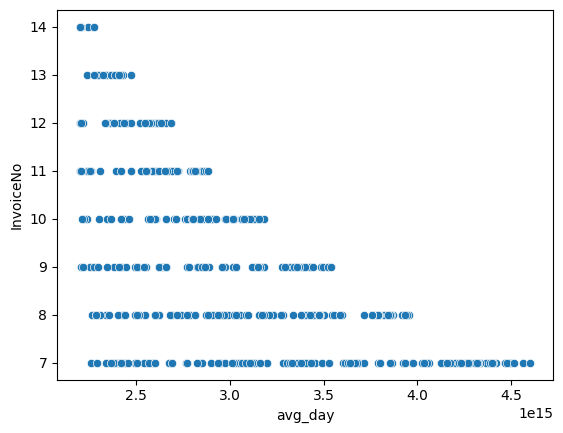

In [ ]:
sns.scatterplot(data = long_time, x = 'avg_day', y = 'InvoiceNo')

In [ ]:
long_time.describe()

,CustomerID,InvoiceNo,InvoiceDate,date,date_diff,avg_day
count,435.000000,435.000000,435,435,435,435
mean,15286.747126,8.949425,2019-01-11 19:59:03.724137984,2019-11-14 07:35:20.827586304,306 days 11:36:17.103448276,35 days 02:40:50.757835267
min,12347.000000,7.000000,2018-11-29 09:45:00,2019-06-17 16:02:00,182 days 23:16:00,25 days 11:07:54.545454545
25%,13886.500000,7.000000,2018-12-06 10:28:30,2019-11-06 13:59:30,271 days 16:03:00,29 days 13:36:38.095238095
50%,15214.000000,8.000000,2018-12-18 14:49:00,2019-11-21 12:40:00,316 days 04:47:00,34 days 00:02:51.428571428
75%,16856.000000,10.000000,2019-02-09 12:17:30,2019-11-30 13:51:00,350 days 04:15:00,39 days 07:45:39.999999999
max,18272.000000,14.000000,2019-06-03 12:37:00,2019-12-07 11:59:00,372 days 22:55:00,53 days 06:22:34.285714285
std,1698.330361,1.867061,NaN,NaN,49 days 01:53:48.235440451,6 days 22:44:17.056403805


Here's some analysis about `Long period of time buyer` :
- From Scatter Plot, Customer with more invoce tend to buy faster.
- There're `435` users with average invoice at `8.94` invoices
- Average time of buying between 1 invoice to another is `35 days 02:40:50.757835268`

#### Short Period


In [ ]:
short_list = new_list_2[new_list_2['avg_day'] < '25 days 10:43:18.160874013'].sort_values(by = 'InvoiceNo')
short_list

,CustomerID,InvoiceNo,InvoiceDate,date,date_diff,avg_day
385,12830.0,7,2019-06-19 10:53:00,2019-10-31 11:54:00,134 days 01:01:00,19 days 03:34:25.714285714
1223,13991.0,7,2019-07-17 12:58:00,2019-11-25 16:18:00,131 days 03:20:00,18 days 17:37:08.571428571
2829,16173.0,7,2019-08-31 15:23:00,2019-11-22 10:53:00,82 days 19:30:00,11 days 19:55:42.857142857
232,12627.0,7,2019-07-20 13:59:00,2019-11-27 12:07:00,129 days 22:08:00,18 days 13:26:51.428571428
3667,17337.0,7,2019-01-31 17:06:00,2019-07-09 14:56:00,158 days 21:50:00,22 days 16:50:00
...,...,...,...,...,...,...
568,13089.0,118,2018-12-03 10:27:00,2019-12-05 09:02:00,366 days 22:35:00,3 days 02:37:55.423728813
1673,14606.0,128,2018-11-29 16:57:00,2019-12-06 19:28:00,372 days 02:31:00,2 days 21:46:10.781250
4041,17841.0,169,2018-11-29 14:30:00,2019-12-06 12:07:00,371 days 21:37:00,2 days 04:48:51.479289940
330,12748.0,223,2018-11-29 12:48:00,2019-12-07 12:20:00,372 days 23:32:00,1 days 16:08:29.058295964


<Axes: xlabel='InvoiceNo', ylabel='avg_day'>

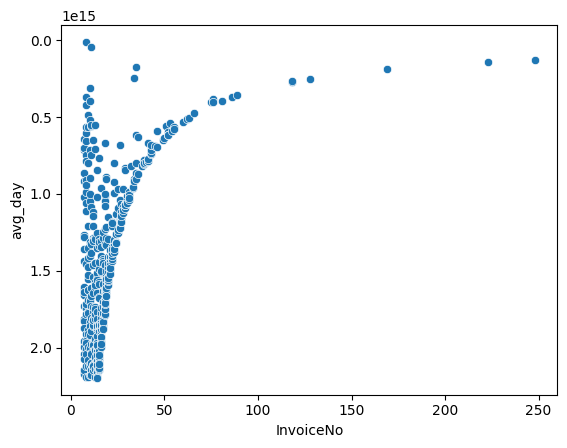

In [ ]:
sns.scatterplot(data = short_list, x = 'InvoiceNo', y = 'avg_day')

In [ ]:
short_list.describe()

,CustomerID,InvoiceNo,InvoiceDate,date,date_diff,avg_day
count,456.000000,456.000000,456,456,456,456
mean,15272.243421,21.390351,2019-02-04 18:38:18.157894656,2019-11-09 20:15:03.289473536,278 days 01:36:45.131578948,16 days 05:26:41.933509658
min,12352.000000,7.000000,2018-11-29 08:26:00,2019-01-29 16:59:00,1 days 02:12:00,0 days 03:16:30
25%,13751.750000,12.000000,2018-12-04 14:44:30,2019-11-09 06:55:15,211 days 17:57:15,11 days 22:36:27.096774192
50%,15250.000000,16.000000,2018-12-15 09:33:30,2019-11-28 11:50:30,320 days 10:31:00,16 days 18:22:37.058823529
75%,16798.750000,23.000000,2019-03-15 17:51:30,2019-12-04 12:35:00,358 days 07:59:30,21 days 10:02:53.035714285
max,18283.000000,248.000000,2019-11-19 14:06:00,2019-12-07 12:49:00,373 days 02:19:00,25 days 10:11:42.857142857
std,1756.800591,21.936798,NaN,NaN,96 days 10:23:37.153120181,6 days 00:38:57.755333892


Here's some analysis about `short period of time buyer` :
- The more invoices customer the shorter time customer use to do another purchase.
- There're `456` users with average invoice at `21.390351` invoices
- Average time of buying between 1 invoice to another is `16 days 05:26:41.933509658`

#### Big Order Users

In [ ]:
new_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,date,revenue,month,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29 08:26:00,15.30,11,2018-11-01
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34,11,2018-11-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29 08:26:00,22.00,11,2018-11-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34,11,2018-11-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34,11,2018-11-01


In [ ]:
prep_big = new_data.groupby(['CustomerID']).agg({
    'InvoiceNo' : 'nunique',
    'Quantity' : 'sum'
}).reset_index()
prep_big.head()

,CustomerID,InvoiceNo,Quantity
0,12346.0,2,0
1,12347.0,7,2458
2,12348.0,4,2341
3,12349.0,1,631
4,12350.0,1,197


In [ ]:
prep_big = prep_big[prep_big['Quantity'] > 0]
prep_big.head()

,CustomerID,InvoiceNo,Quantity
1,12347.0,7,2458
2,12348.0,4,2341
3,12349.0,1,631
4,12350.0,1,197
5,12352.0,11,470


In [ ]:
prep_big.describe()

,CustomerID,InvoiceNo,Quantity
count,4318.000000,4318.000000,4318.000000
mean,15300.725567,5.117647,1133.584067
std,1719.770045,9.381230,4689.262420
min,12347.000000,1.000000,1.000000
25%,13816.250000,1.000000,159.000000
50%,15299.500000,3.000000,373.000000
75%,16777.750000,6.000000,978.000000
max,18287.000000,248.000000,196143.000000


In [ ]:
prep_big = prep_big[prep_big['InvoiceNo'] > 1]
prep_big.head()

,CustomerID,InvoiceNo,Quantity
1,12347.0,7,2458
2,12348.0,4,2341
5,12352.0,11,470
9,12356.0,3,1591
11,12358.0,2,248


In [ ]:
big_user = prep_big[prep_big['Quantity'] >= 1133.58]
big_user.head()

,CustomerID,InvoiceNo,Quantity
1,12347.0,7,2458
2,12348.0,4,2341
9,12356.0,3,1591
12,12359.0,6,1612
13,12360.0,3,1165


In [ ]:
big_user['avg_qty'] = big_user['Quantity']/big_user['InvoiceNo']
big_user.head()

<ipython-input-50-60ee2ced628e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_user['avg_qty'] = big_user['Quantity']/big_user['InvoiceNo']


,CustomerID,InvoiceNo,Quantity,avg_qty
1,12347.0,7,2458,351.142857
2,12348.0,4,2341,585.250000
9,12356.0,3,1591,530.333333
12,12359.0,6,1612,268.666667
13,12360.0,3,1165,388.333333


In [ ]:
result_big = big_user.sort_values(by = 'avg_qty', ascending = False)
result_big

,CustomerID,InvoiceNo,Quantity,avg_qty
55,12415.0,26,76946,2959.461538
525,13027.0,6,17280,2880.000000
1702,14646.0,76,196143,2580.828947
2521,15749.0,4,9014,2253.500000
2925,16308.0,4,8000,2000.000000
...,...,...,...,...
1642,14560.0,24,1223,50.958333
2306,15465.0,24,1217,50.708333
4047,17850.0,35,1693,48.371429
1673,14606.0,128,5978,46.703125


<Axes: xlabel='InvoiceNo', ylabel='avg_qty'>

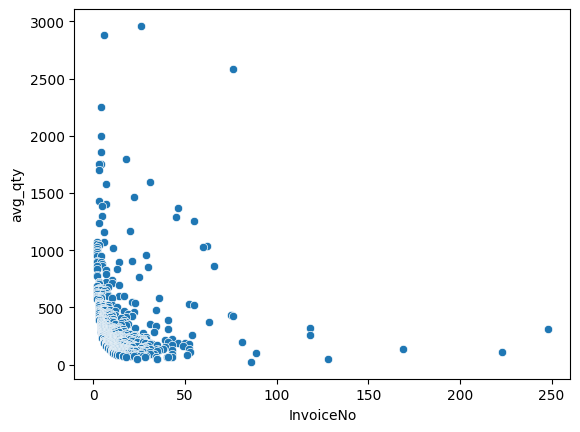

In [ ]:
sns.scatterplot(data = result_big, x = 'InvoiceNo', y = 'avg_qty')

In [ ]:
result_big.describe()

,CustomerID,InvoiceNo,Quantity,avg_qty
count,920.000000,920.000000,920.000000,920.000000
mean,15115.304348,13.585870,3984.052174,323.966179
std,1781.240042,17.273238,9619.262747,299.325812
min,12347.000000,2.000000,1134.000000,23.825581
25%,13522.250000,6.000000,1478.750000,165.349432
50%,15032.500000,9.000000,2007.000000,238.320513
75%,16684.500000,15.000000,3291.250000,369.031250
max,18287.000000,248.000000,196143.000000,2959.461538


Here's the analysis result from Big Orders :
- From Scatter Plot, Customer tend to do repeat order, with a big amount of qty. The less invoice customer has the more qty customer order.
- From `920` Customers, with average result of `13.58` invoice dan average qty `323.96`

## Testing Hypothesis <a id = 'hypothesis'></a>

### The differences in average order frequency and size for different user segments.


H0 = There're no differences in average order frequency and size for different user segments

H1 = There're differences in average order frequency and size for different user segments

In [ ]:
short_inv = short_list['InvoiceNo'].var()
long_inv = long_time['InvoiceNo'].var()
short_inv, long_inv

(481.2231154810102, 3.485915567561841)

In [ ]:
mean_short = short_list['InvoiceNo'].mean()
mean_long = long_time['InvoiceNo'].mean()
mean_short,mean_long

(21.390350877192983, 8.949425287356322)

In [ ]:
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - (1.5 * IQR)
    higher = Q3 + (1.5 * IQR)
    return lower, higher

In [ ]:
data_list = [short_list, long_time]

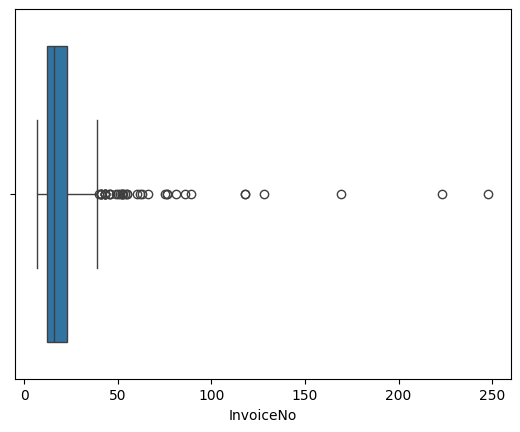

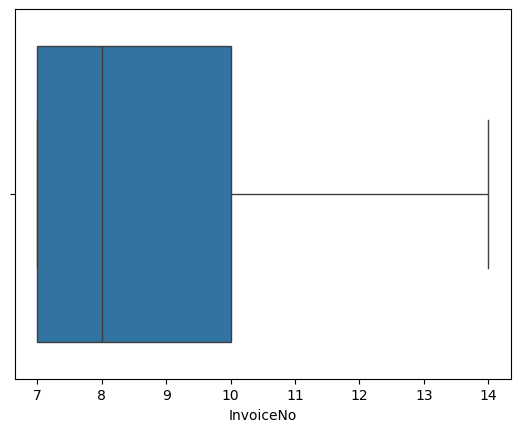

In [ ]:
for data in data_list:
  sns.boxplot(x=data['InvoiceNo'])
  plt.show()

-4.5 39.5


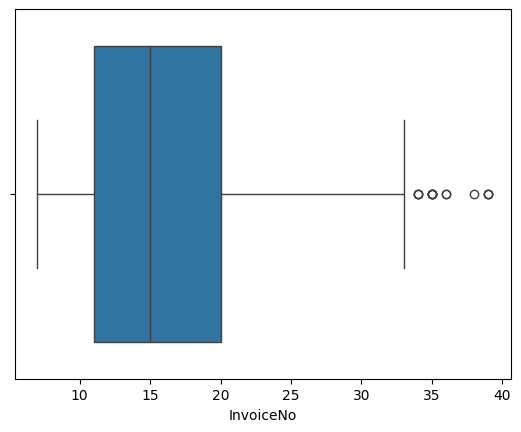

2.5 14.5


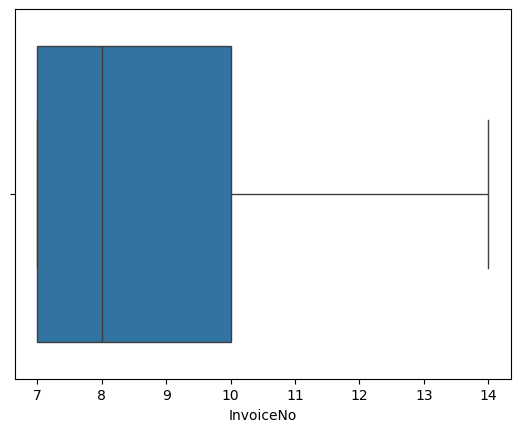

In [ ]:
for data in data_list :
  lower, upper = outliers(data, 'InvoiceNo')
  print(lower, upper)
  data = data[(data['InvoiceNo'] > lower) & (data['InvoiceNo'] < upper)]
  sns.boxplot(x=data['InvoiceNo'])
  plt.show()

In [ ]:
alpha = 0.05

In [ ]:
result = st.ttest_ind(short_list['InvoiceNo'], long_time['InvoiceNo'], equal_var = True)

print('p-value: ', result.pvalue)

if result.pvalue < alpha :
    print('We reject the null hypotesis')
else :
    print("We can't reject the null hypotesis")

p-value:  6.69197367556911e-30
We reject the null hypotesis


The hypothesis :    

`H0 = There're no differences in average order frequency and size for different user segments`

`H1 = There're differences in average order frequency and size for different user segments`

The result after the testing is `We reject the null hypothesis (H0)

### The differences on average revenue by item on member and non member

H0 = There're no difference between average revenue by item on member and non member

H1 = There're difference between average revenue by item on member and non member

In [ ]:
not_member  = new_data[new_data['CustomerID'].isnull()]
not_member.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,date,revenue,month,month_year
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN,2018-11-29 14:32:00,2.51,11,2018-11-01
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN,2018-11-29 14:32:00,5.02,11,2018-11-01
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN,2018-11-29 14:32:00,3.40,11,2018-11-01
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN,2018-11-29 14:32:00,3.32,11,2018-11-01
1447,536544,21790,VINTAGE SNAP CARDS,9,2018-11-29 14:32:00,1.66,NaN,2018-11-29 14:32:00,14.94,11,2018-11-01


In [ ]:
not_member = not_member.groupby('Description').agg({
    'revenue' : 'mean'
}).reset_index()
not_member.head()

,Description,revenue
0,4 PURPLE FLOCK DINNER CANDLES,10.020000
1,50'S CHRISTMAS GIFT BAG LARGE,3.569000
2,DOLLY GIRL BEAKER,3.213415
3,I LOVE LONDON MINI BACKPACK,9.676111
4,NINE DRAWER OFFICE TIDY,38.840000


In [ ]:
member = new_data[new_data['CustomerID'].notnull()]
member.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,date,revenue,month,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29 08:26:00,15.30,11,2018-11-01
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34,11,2018-11-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29 08:26:00,22.00,11,2018-11-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34,11,2018-11-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29 08:26:00,20.34,11,2018-11-01


In [ ]:
member = member.groupby('Description').agg({
    'revenue' : 'mean'
}).reset_index()
member.head()

,Description,revenue
0,4 PURPLE FLOCK DINNER CANDLES,6.942564
1,50'S CHRISTMAS GIFT BAG LARGE,20.634091
2,DOLLY GIRL BEAKER,19.648214
3,I LOVE LONDON MINI BACKPACK,20.771429
4,I LOVE LONDON MINI RUCKSACK,4.150000


In [ ]:
not_member_var = not_member['revenue'].var()
member_var = member['revenue'].var()
not_member_var, member_var

(16841.99307365141, 104058.94910623385)

In [ ]:
data_name = [not_member, member]

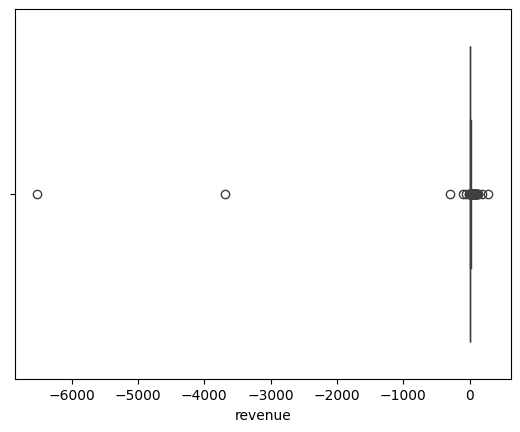

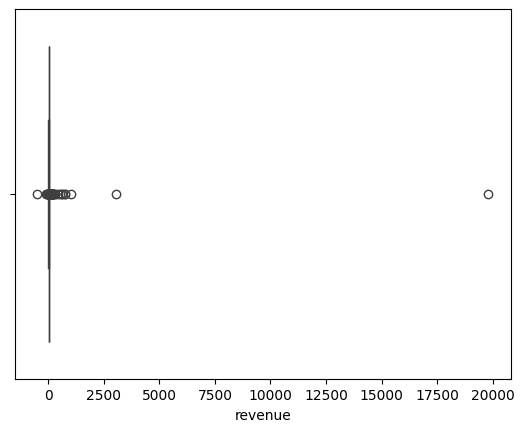

In [ ]:
for name in data_name:
  sns.boxplot(x=name['revenue'])
  plt.show()

-7.369619987778242 22.228866646297067


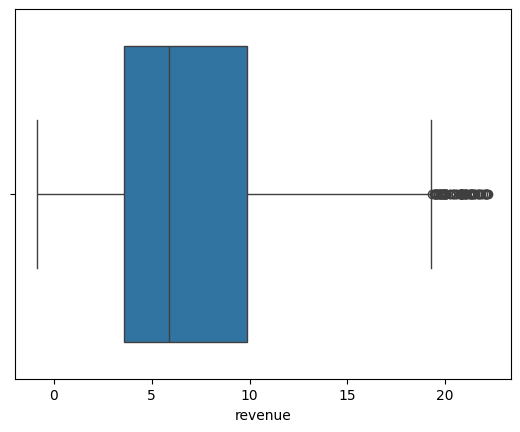

-10.351545691226242 37.67788393647488


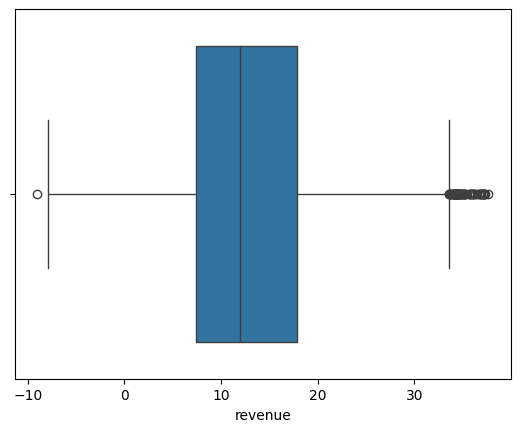

In [ ]:
for name in data_name:
  lower, upper = outliers(name, 'revenue')
  print(lower, upper)
  name = name[(name['revenue'] > lower) & (name['revenue'] < upper)]
  sns.boxplot(x=name['revenue'])
  plt.show()

In [ ]:
result = st.ttest_ind(not_member['revenue'], member['revenue'], equal_var = False)

print('p-value: ', result.pvalue)

if result.pvalue < alpha :
    print('We reject the null hypotesis')
else :
    print("We can't reject the null hypotesis")

p-value:  0.0027005314810672584
We reject the null hypotesis


The hypothesis :    

`H0 = There're no difference between average revenue by item on member and non member`

`H1 = There're difference between average revenue by item on member and non member`

The result after the testing is `We reject the null hypothesis (H0)



## Summary <a id = 'summ'></a>

Data containing information about :     

*	InvoiceNo
*	StockCode
*	Description
*	Quantity
*	InvoiceDate
*	UnitPrice
*	CustomerID



There're 4371 users. Here we categorize the users based on purchase history :
- Long Period Users,
- Short Period Users, &
- Big Order Users.

Here is some critheria that set as Long Period Users :
- Users do more than or equal to 7 (round up average of invoce count) transaction / invoice and have different date between 1st invoice date with the last invoice date,
- Users average date must be more than or equal to `25 days 10:43:18.160874013` (Average of average date)

Here is some critheria that set as Short Period Users :
- Users do more than or equal to 7 (round up average of invoce count) transaction / invoice and have different date between 1st invoice date with the last invoice date,
- Users average date must be less than `25 days 10:43:18.160874013` (Average of average date)

Here is some critheria that set as Big Order Users :
- Users with more than 0 Qty purchase, and more than 1 invoice.
- With minimal purchase at `1133.58` (Average of Qty)


Here's some analysis about `Long period of time buyer` :
- From Scatter Plot, Customer with more invoce tend to buy faster.
- There're `435` users with average invoice at `8.94` invoices
- Average time of buying between 1 invoice to another is `35 days 02:40:50.757835268`

Here's some analysis about `short period of time buyer` :
- The more invoices customer the shorter time customer use to do another purchase.
- There're `456` users with average invoice at `21.390351` invoices
- Average time of buying between 1 invoice to another is `16 days 05:26:41.933509658`

Here's the analysis result from Big Orders :
- From Scatter Plot, Customer tend to do repeat order, with a big amount of qty. The less invoice customer has the more qty customer order.
- From `920` Customers, with average result of `13.58` invoice dan average qty `323.96`

Link to Dashboard :

[Dashboard](https://public.tableau.com/views/Final_17096962377890/E-Commerce?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link)


Link to PPT :

[Presentation](https://docs.google.com/presentation/d/1UsgiLBn4zjuHi4VuhmH5AdGqzd-hnlntrBQZ4_rFbsk/edit?usp=sharing)


### Summary Data Preparation


The data type get adjust to the correct type. The detail of the changes :    
*  `InvoiceDate` type from `object` to `datetime64[ns]`

Here's some finding on null data step :
* Row with `UnitPrice 0` get eliminate, &
* `UnitPrice below 0` mean its a refund.

Here's some finding on exploration step :
* `date` containing the date of the `InvoiceDate`
* `month` containing the month of the `InvoiceDate`
* `revenue` containing the revenue from `Quantity * UnitPrice`

### Summary Data Analysis

The result of Revenue Trend :
- Lowest revenue on `2018-11` with `104842.84`
- And Highest revenue on `2019-11` with `1496272.65`

The result of Average purchase size :     
- Average on `35.82`
- Lowest revenue on `26.72`
- Highest on `50.01`

Month to month revenue trend's result :
- The average number is on `33.81`
- The minimal is on `24.84`
- The maximal is on `41.22`

The hypothesis :    

`H0 = There're no differences in average order frequency and size for different user segments`

`H1 = There're differences in average order frequency and size for different user segments`

The result after the testing is `We reject the null hypothesis (H0)`

The hypothesis :    

`H0 = There're no difference between average revenue by item on member and non member`

`H1 = There're difference between average revenue by item on member and non member`

The result after the testing is `We reject the null hypothesis (H0)

